In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('C:/Users/hp.ss/Downloads/Heart_disease.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CVD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  CVD              4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
CVD                  0
dtype: int64

In [6]:
df['glucose']=df['glucose'].fillna(df['glucose'].mean())

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
CVD                0
dtype: int64

In [9]:
df.shape

(3989, 16)

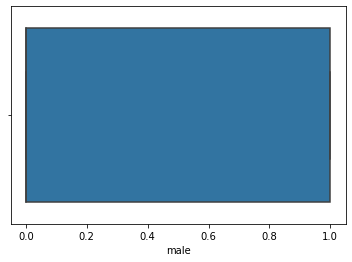

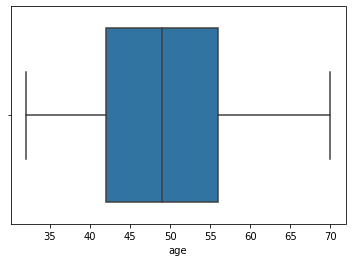

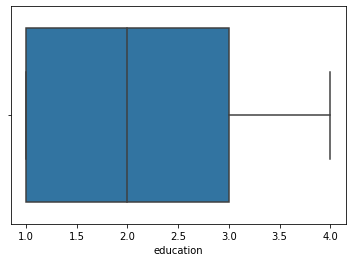

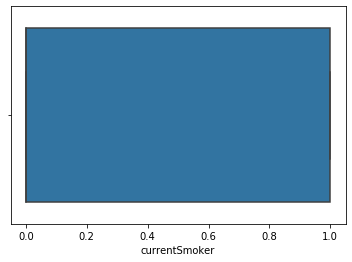

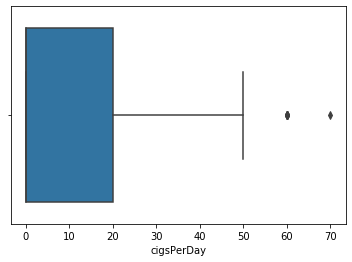

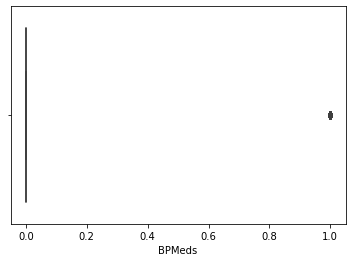

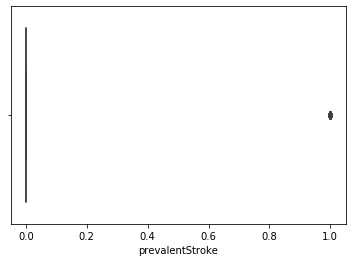

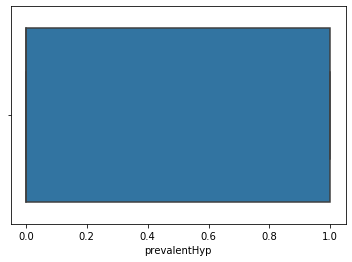

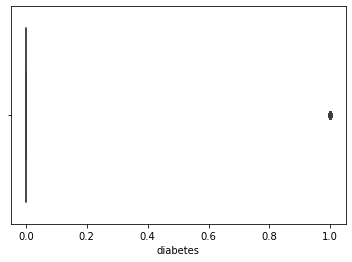

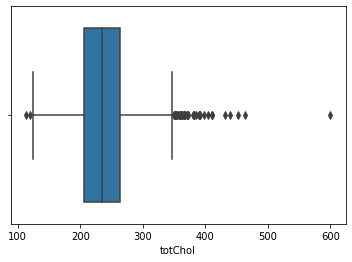

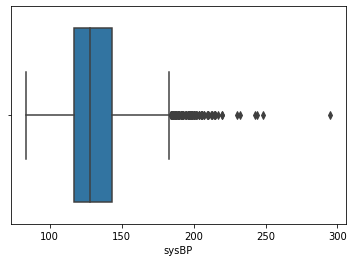

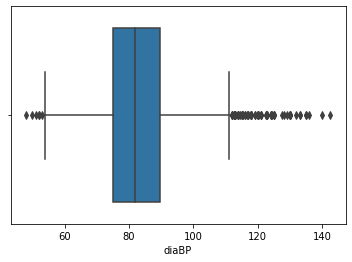

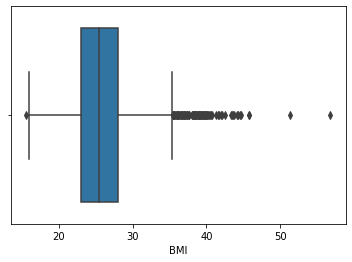

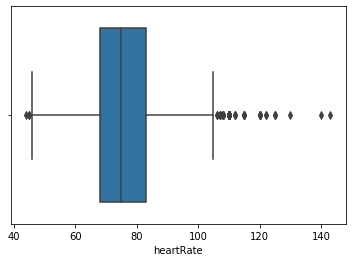

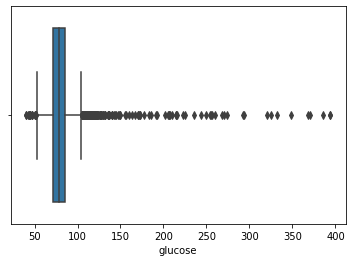

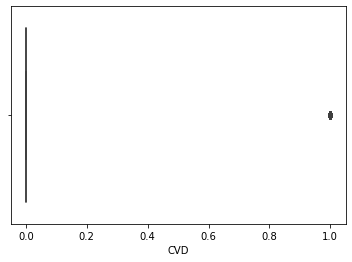

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
for i in ('totChol','sysBP','diaBP','BMI','heartRate','glucose'):
    q1= df[i].quantile(0.25)
    q3= df[i].quantile(0.75)
    iqr= q3-q1
    ll= q1-(1.5*iqr)
    ul= q3+(1.5*iqr)
    df=df[(df[i]>ll)&(df[i]<ul)]

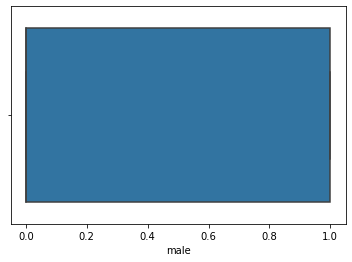

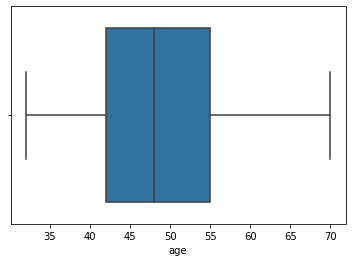

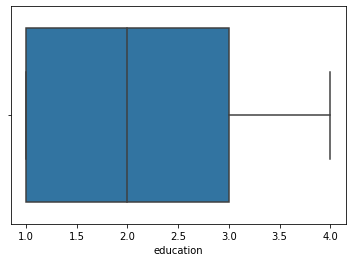

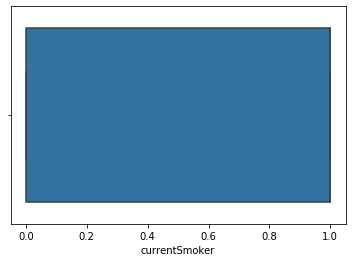

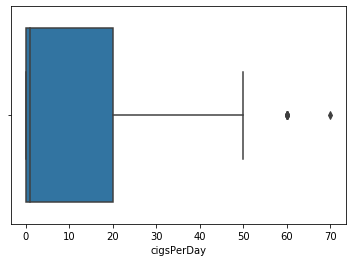

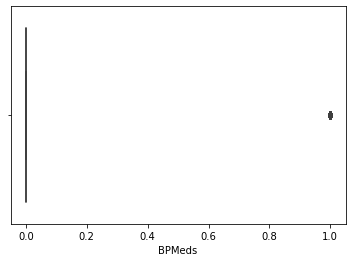

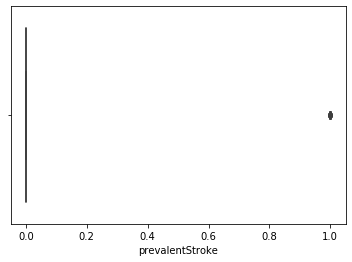

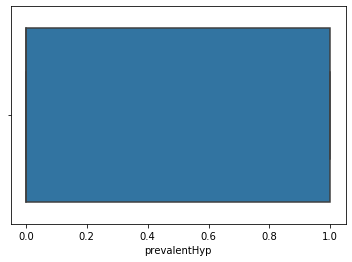

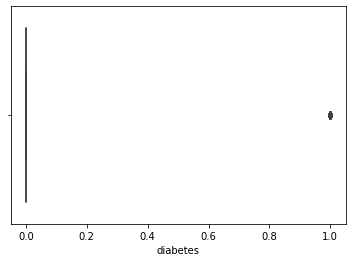

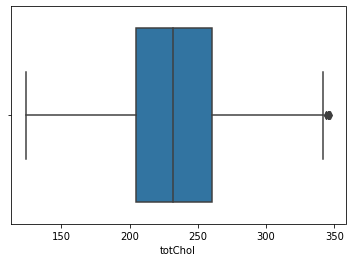

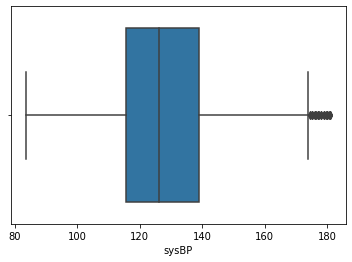

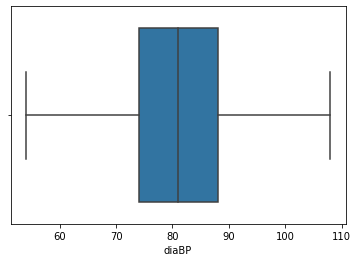

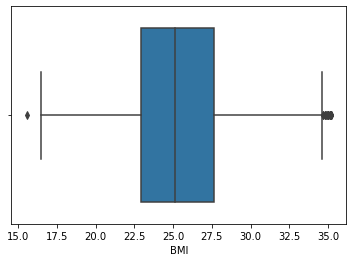

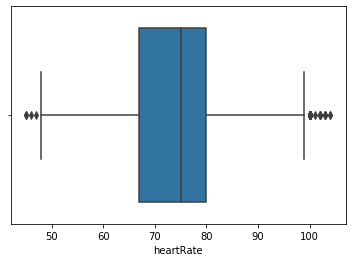

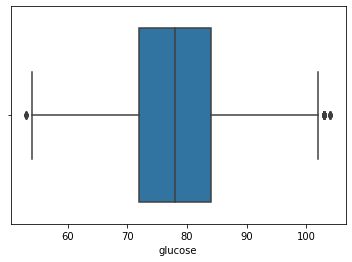

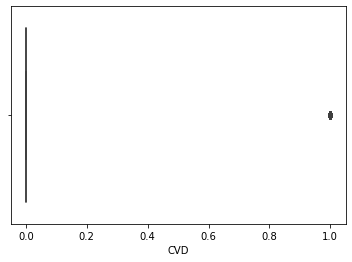

In [12]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [13]:
x = df.drop(['education','CVD'],axis=1)
y= df['CVD']

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=0)

In [15]:
xtrain.shape

(2383, 14)

In [16]:
xtest.shape

(1022, 14)

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
mod= lr.fit(xtrain,ytrain)
ypred= mod.predict(xtest)

In [18]:
ypred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
df['CVD'].value_counts()

0    2969
1     436
Name: CVD, dtype: int64

In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       893
           1       0.40      0.02      0.03       129

    accuracy                           0.87      1022
   macro avg       0.64      0.51      0.48      1022
weighted avg       0.82      0.87      0.82      1022



In [21]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
mod= rf.fit(xtrain,ytrain)
ypred= mod.predict(xtest)

In [22]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       893
           1       0.60      0.02      0.04       129

    accuracy                           0.87      1022
   macro avg       0.74      0.51      0.49      1022
weighted avg       0.84      0.87      0.82      1022



In [24]:
import imblearn

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
oversample = SMOTE()
x_new,y_new= oversample.fit_resample(x,y)

In [27]:
xtrain_new,xtest_new,ytrain_new,ytest_new = train_test_split(x_new,y_new,test_size=0.3,random_state=0)

In [28]:
lr= LogisticRegression()
mod= lr.fit(xtrain_new,ytrain_new)
ypred= mod.predict(xtest_new)

In [29]:
print(classification_report(ytest_new,ypred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       898
           1       0.66      0.68      0.67       884

    accuracy                           0.67      1782
   macro avg       0.67      0.67      0.67      1782
weighted avg       0.67      0.67      0.67      1782



In [46]:
rf1= RandomForestClassifier()
mod1= rf1.fit(xtrain_new,ytrain_new)
ypred1 = mod1.predict(xtest_new)

In [47]:
print(classification_report(ytest_new,ypred1))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       898
           1       0.91      0.90      0.91       884

    accuracy                           0.91      1782
   macro avg       0.91      0.91      0.91      1782
weighted avg       0.91      0.91      0.91      1782



In [50]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(rf1,xtrain_new,ytrain_new,cv=5,scoring='f1')
score.mean()

0.8873932484516956

In [51]:
score.std()

0.008866472918460374

In [52]:
score.std()/score.mean()

0.0099915938440262

In [43]:
from sklearn.model_selection import GridSearchCV
rf= RandomForestClassifier()
params= {'max_depth': [4,5,7, 10,13,15], 'max_features': ['auto', 'log2','sqrt'], 'n_estimators': [5, 6,10,30,50,70,120,150,200]}
grid= GridSearchCV(rf,param_grid=params,cv=5,scoring='f1')
grid= grid.fit(xtrain_new,ytrain_new)
grid.best_params_

{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 200}

In [48]:
rf2= RandomForestClassifier(max_depth= 15, max_features='log2', n_estimators=200)
mod2= rf2.fit(xtrain_new,ytrain_new)
ypred2 = mod2.predict(xtest_new)

In [49]:
print(classification_report(ytest_new,ypred2))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       898
           1       0.89      0.92      0.90       884

    accuracy                           0.90      1782
   macro avg       0.90      0.90      0.90      1782
weighted avg       0.90      0.90      0.90      1782



In [57]:
score= cross_val_score(rf2,xtrain_new,ytrain_new,cv=5,scoring='f1')
score.mean()

0.8748904832607349

In [58]:
score

array([0.86581097, 0.88333333, 0.875     , 0.87573964, 0.87456847])

In [59]:
score.std()

0.005559785393668727

In [60]:
score.std()/score.mean()

0.006354835833791782

In [61]:
import pickle
pickle_out = open("heart_disease.pkl", mode = "wb") 
pickle.dump(mod2, pickle_out) 
pickle_out.close()